# Introduction

Ultimate Fighting Championship is a mixed martial arts organization. It allows fighters of different styles and different background to fight with standard mixed martial arts rules. They were formed in 1993 when fighting against different style of fighters was very rare and so most people only watched fight in events like boxing's pay-per-view or with the olympics where all of these styles compete. 

Today UFC is being "broadcast in over 165 countries and territories, via more than 60 global broadcast partners, to more than 1.1 billion TV households worldwide in over 40 different languages". UFC has grown into a massive company with pay-per-view events every few weeks and lots of fighter wanting to join it. 

Here, we have looked at the fighters and various things about them. We look at their style and see if they lean more towards striking or grappling and how does their defense look against both of these styles. We also look at the stance that they used. Finally we try to see which weight classes the fighters are fighting in.

# Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

Pandas: Used to edit and create different dataframes <br>
Matplotlib: Used to create graphs<br>
Seaborn: Used to create graphs as well but some
        things are easier with seaborn like color scheme<br>
Numpy: Used to manipulate numbers through different arithematic operations<br>
Scipy: 

# The Data

We were looking for data on ufc fighters and found that Yuan Tian had already scraped the ufc website to find the data in 2017. Therefore, we used the csv file that is public in his github page as the basis for our project. The data includes several things like the fighter's name, their wins, losses, drax, weight, stance and information about their striking, take downs, submissions and defense. 

In [3]:
original_ufc = pd.read_csv("ufc_fighters.csv")
original_ufc.sort_values('name', ascending=False)

count = 0
tempname = []
for i, rows in original_ufc.iterrows():
    if type(rows['dob']) is str:
        spl = rows['dob'].split(' ')
        year = spl[2]
        year = int(year)
        total_fights = int(rows['win']) + int(rows['lose']) + int(rows['draw']) + int(rows['nc'])
        if year > 1979:
            if total_fights > 9:
                tempname.append(rows)
                updated_ufc = (original_ufc.name != rows['name'])

updated_ufc = pd.DataFrame(tempname)
updated_ufc = updated_ufc.dropna()
updated_ufc = updated_ufc.reset_index()
updated_ufc = updated_ufc.drop('index', 1)
updated_ufc.head()

,fighter_id,name,win,lose,draw,nc,height,weight,reach,stance,dob,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,last_updated
0,4,Rolando Dy,9,7,1,1,"5' 8""",145 lbs.,"69""",Orthodox,"Aug 11, 1990",3.04,37%,4.47,52%,0.30,20%,68%,0.0,2018-11-21 19:35:14.677808
1,5,Jessica Eye,13,6,0,1,"5' 6""",125 lbs.,"66""",Orthodox,"Jul 27, 1986",3.42,36%,3.32,59%,0.59,71%,60%,0.8,2018-11-21 19:35:17.495278
2,10,Cris Cyborg,20,1,0,1,"5' 8""",145 lbs.,"68""",Orthodox,"Jul 09, 1985",7.02,52%,1.79,70%,0.85,62%,91%,0.3,2018-11-21 19:35:36.351918
3,11,Mike Kyle,19,9,1,2,"6' 4""",205 lbs.,"77""",Orthodox,"Mar 31, 1980",4.50,51%,2.76,54%,1.55,62%,50%,0.9,2018-11-21 19:35:40.545685
4,15,Alptekin Ozkilic,9,4,0,0,"5' 5""",125 lbs.,"65""",Orthodox,"Mar 27, 1986",3.81,32%,5.72,59%,4.21,58%,75%,0.0,2018-11-21 19:35:57.905297


When we recieved the data and looked at it, we knew that we would have to trim the data. UFC has been around for more than two decades now so the number of fighters that have founght in the octagon would be too much. Therefore, we started to remove some of the fighters from the list. The first fighter we deleted were the old ones. We wanted to see how fighter fight and who the best amongst them are. Therefore, we deleted the fighters that were older than 40. With the date of birth present, this task was not difficult. We also dropped fighters who did not have a date of birth listed so there would be no way for us to find out when they were fighting. In the UFC, it takes a while for people to take notice. To become a good fighter one needs to be have lots of fight under their with significant amount of wins. We decided to delet the fighters that had less than 10 fights so that these fighters are not amatures. Lastly, we wanted the data to be clean and wanted all the points to be present. So we had to delet any values that were not present in any of the columns.

In [4]:
tot_fights = []
for i, rows in updated_ufc.iterrows():
    total_fights = int(rows['win']) + int(rows['lose']) + int(rows['draw']) + int(rows['nc'])
    tot_fights.append(total_fights)

updated_ufc["total_fights"] = tot_fights

A new column is created to look at the total wins for each fighter. This category might be use later on when we are trying to see who the best fighters are.

In [5]:
def p2f(x):
    return float(x.strip('%'))/100

The purpose of this functio is to be able to convert a percentage into a value that can be used later in arithematic operation with other values.

In [5]:
str_val = []
grap_val = []
def_val = []
for i, rows in updated_ufc.iterrows():
    str_val.append(float((rows["win"]*1.1) -(rows["lose"]*1.5)) * p2f(rows["Str_Acc"]))
    grap_val.append(float((rows["win"]*1.1) -(rows["lose"]*1.5)) * p2f(rows["TD_Acc"]))
    #should probably add some weight to sub_avg
    #there are a lots of 0% for TD_Acc. We might have to remove those fighters.
    def_val.append(float((rows["win"]*1.1) -(rows["lose"]*1.5)) * (p2f(rows["Str_Def"]) + p2f(rows["TD_Def"])))
    
updated_ufc['str_val'] = str_val
updated_ufc['grap_val'] = grap_val
updated_ufc['def_val'] = def_val
updated_ufc.head()

,fighter_id,name,win,lose,draw,nc,height,weight,reach,stance,...,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,last_updated,total_fights,str_val,grap_val,def_val
0,4,Rolando Dy,9,7,1,1,"5' 8""",145 lbs.,"69""",Orthodox,...,52%,0.30,20%,68%,0.0,2018-11-21 19:35:14.677808,18,-0.222,-0.120,-0.720
1,5,Jessica Eye,13,6,0,1,"5' 6""",125 lbs.,"66""",Orthodox,...,59%,0.59,71%,60%,0.8,2018-11-21 19:35:17.495278,20,1.908,3.763,6.307
2,10,Cris Cyborg,20,1,0,1,"5' 8""",145 lbs.,"68""",Orthodox,...,70%,0.85,62%,91%,0.3,2018-11-21 19:35:36.351918,22,10.660,12.710,33.005
3,11,Mike Kyle,19,9,1,2,"6' 4""",205 lbs.,"77""",Orthodox,...,54%,1.55,62%,50%,0.9,2018-11-21 19:35:40.545685,31,3.774,4.588,7.696
4,15,Alptekin Ozkilic,9,4,0,0,"5' 5""",125 lbs.,"65""",Orthodox,...,59%,4.21,58%,75%,0.0,2018-11-21 19:35:57.905297,13,1.248,2.262,5.226


Created three new columns in the dataframe. <br>
<br>
1) The first column calculates the striking values by looking at striking accuracy but also includes the fighter's record. This will allow us to sort out the best fighters later on. Best fighters do not just have good statistics but also have a winning record with a lot of fights under their belt. <br>
<br>
2) The grappling column also takes into account wins and losses while also including take down accuracy as well as submission average. While take down accuracy is a good sign of a good grappler, submission average just boosts the validity of these fighters that are good on the ground.<br>
<br>
3) Last column that was added was defense. We looked at wins, losses, strikes defended and take down defended to create the value for this column. A good defensive fighter can not only dodge strikes but also refuses to be taken down against a good grappler.

In [6]:
updated_ufc['weight'] = updated_ufc['weight'].map(lambda x: x.rstrip(' lbs.'))
pd.to_numeric(updated_ufc['weight'])
updated_ufc['weight'] = updated_ufc['weight'].astype(int)

In [7]:
#Lightweight
light_df = updated_ufc[updated_ufc['weight']==155]

#Welterweight
welter_df = updated_ufc[updated_ufc['weight'] == 170]

#Middleweight
middle_df = updated_ufc[updated_ufc['weight'] == 185]

#Light Heavyweight
liheavy_df = updated_ufc[updated_ufc['weight'] == 205]

#Heavyweight
heavy_df = updated_ufc[updated_ufc['weight'] > 205 ]

#Orthodox
orth_df = updated_ufc[updated_ufc['stance'] == 'Orthodox']
#orth_df = orth_df.sort_values(by=['grap_val'], ascending=False)
#Southpaw
south_df = updated_ufc[updated_ufc['stance'] == 'Southpaw']

#Switch
switch_df = updated_ufc[updated_ufc['stance'] == 'Switch']


In [8]:
def linereg_func(x_val, y_val, title):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_val, y_val)

    plt.plot(x_val, y_val, 'o')

    plt.xlabel('Grappling')
    plt.ylabel('Striking')
    plt.title(title)
    x=x_val
    plt.plot(x, intercept + slope*x, 'r', label='fitted line')

We wanted to look at plots for various things. This function plots the graph of striking as the y value and grappling as the x value. The graph is supposed to show the distribution of fighters in each of the different categories. Moreover, it also graphs a line of linear regression showing the relationship between grappling and strinking of the fighters. It show where most of the fighters average out and can also predict where the new fighters might be situated.

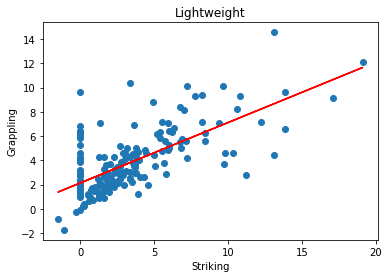

In [9]:
linereg_func(light_df.grap_val, light_df.str_val, "Lightweight")


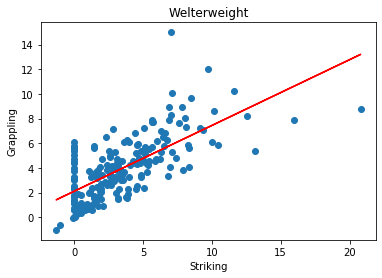

In [10]:
linereg_func(welter_df.grap_val, welter_df.str_val, "Welterweight")


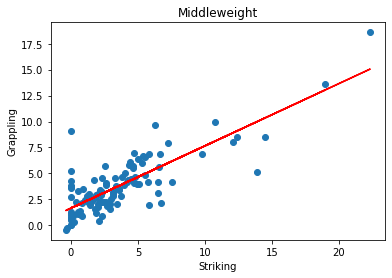

In [11]:
linereg_func(middle_df.grap_val, middle_df.str_val, "Middleweight")

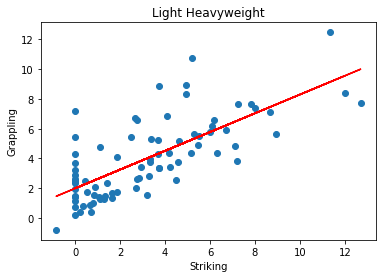

In [12]:
linereg_func(liheavy_df.grap_val, liheavy_df.str_val, "Light Heavyweight")

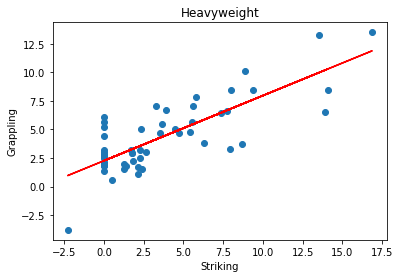

In [13]:
linereg_func(heavy_df.grap_val, heavy_df.str_val, "Heavyweight")

Text(0.5, 1.0, 'Orthodox')

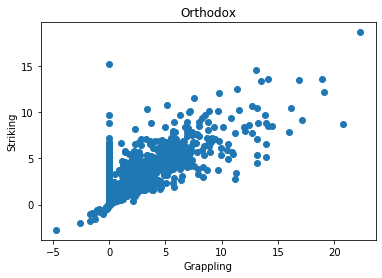

In [14]:
plt.scatter(orth_df['grap_val'], orth_df['str_val'])
plt.xlabel('Grappling')
plt.ylabel('Striking')
plt.title('Orthodox')

Text(0.5, 1.0, 'Southpaw')

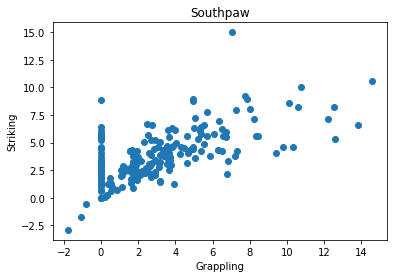

In [15]:
plt.scatter(south_df['grap_val'], south_df['str_val'])
plt.xlabel('Grappling')
plt.ylabel('Striking')
plt.title('Southpaw')

Text(0.5, 1.0, 'Switch')

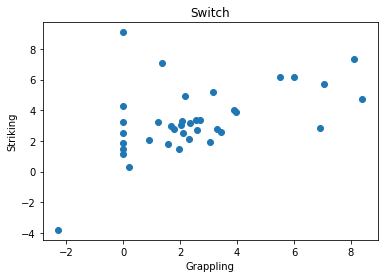

In [16]:
plt.scatter(switch_df['grap_val'], switch_df['str_val'])
plt.xlabel('Grappling')
plt.ylabel('Striking')
plt.title('Switch')

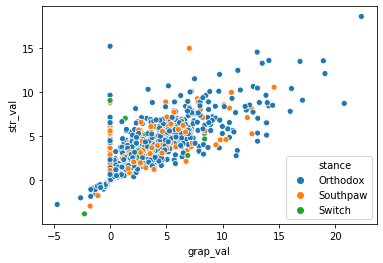

In [25]:
ax = sns.scatterplot(x="grap_val", y="str_val", hue="stance", data=updated_ufc)


In [18]:
def add_overall(df):
    overall = []
    for index, rows in df.iterrows():
        if(rows["weight"] >= 155):
            overall.append((rows['str_val']*.33) + (rows['grap_val']*.33) + (rows['def_val']*.33))
        else:
            overall.append(np.nan)

    df["overall_rating"] = overall
    df= df.sort_values(by='overall_rating', ascending=False)
    df = df.dropna()
    return df


In [19]:


count_light =count_welter =count_middle = count_liheavy = count_heavy = 0
ufc_weight = add_overall(updated_ufc)
ufc_weight = ufc_weight.head(100)

for index, rows in ufc_weight.iterrows():
    if (rows["weight"] == 155):
        count_light +=1
    elif (rows["weight"] == 170):
        count_welter += 1
    elif (rows["weight"] == 185):
        count_middle += 1
    elif (rows["weight"] == 205):
        count_liheavy += 1
    elif (rows["weight"] > 205):
        count_heavy += 1
        
weight_class = pd.DataFrame({"Weight Class" :["Lightweight", "Welterweight", "Middleweight", "Light Heavyweight", "Heavyweight"],
                            "Count":[count_light, count_welter, count_middle, count_liheavy, count_heavy]})
weight_class


,Weight Class,Count
0,Lightweight,30
1,Welterweight,32
2,Middleweight,14
3,Light Heavyweight,13
4,Heavyweight,11


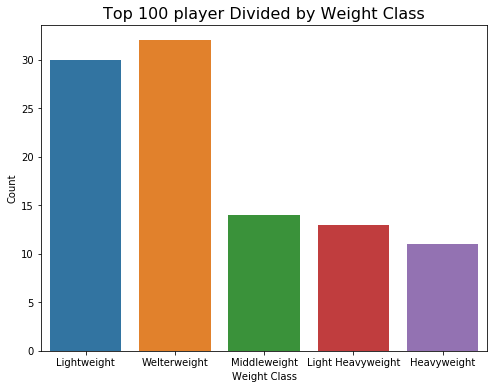

In [20]:
plt.figure(figsize=(8,6))
plt.title("Top 100 player Divided by Weight Class", fontsize=16)
sns.barplot(data=weight_class, x='Weight Class', y='Count')
plt.show()